In [57]:
#Import all needed libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Read the dataset
df_fd = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows=100000)
df_fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
#Checking the columns name
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [23]:
#Shape of dataset
df_fd.shape

(100000, 11)

In [24]:
#Statistical description
df_fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [25]:
#Checking the null values
df_fd.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [26]:
#Count for type
df_fd['type'].value_counts()

PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: type, dtype: int64

In [27]:
#Count for isFraud
df_fd['isFraud'].value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

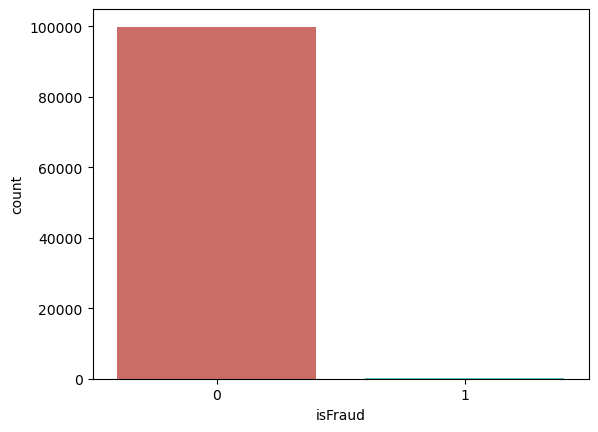

In [28]:
#Countplot for isFraud
sns.countplot(x='isFraud', data= df_fd, palette='hls')

<AxesSubplot:xlabel='type', ylabel='count'>

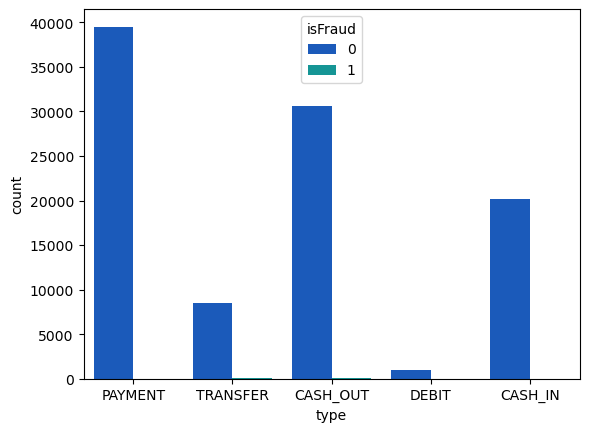

In [29]:
#Countplot for type
sns.countplot(x='type', hue='isFraud', data= df_fd, palette='winter')

<AxesSubplot:xlabel='type', ylabel='amount'>

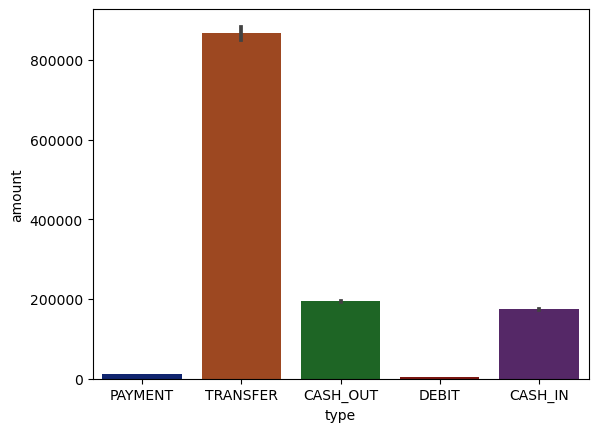

In [30]:
sns.barplot(x='type',y='amount',data= df_fd, palette ="dark")

<AxesSubplot:xlabel='amount', ylabel='Density'>

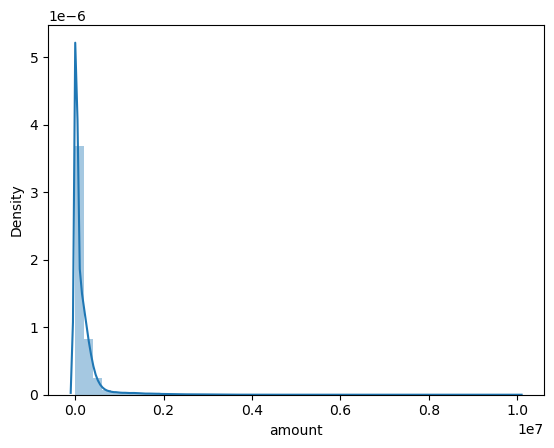

In [31]:
#Distplot for amount
sns.distplot(df_fd['amount'])

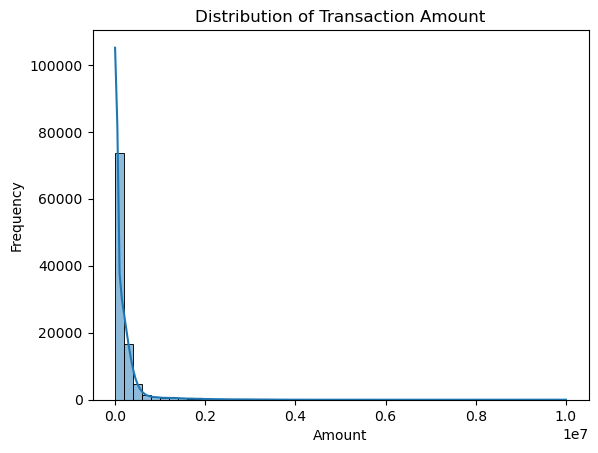

In [32]:
#Histplot for amount
sns.histplot(df_fd['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

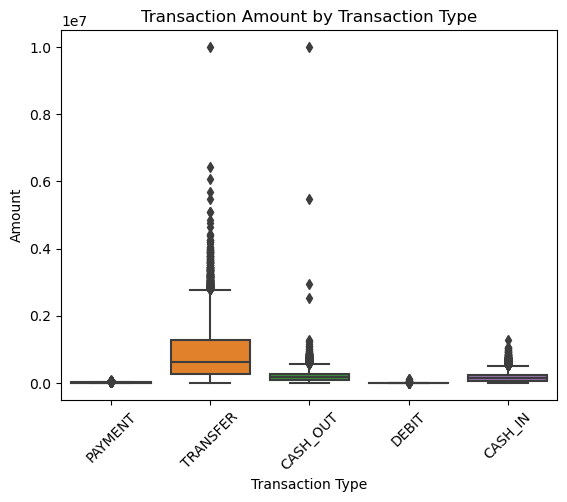

In [33]:
#Boxplot for type and amount
sns.boxplot(x='type', y='amount', data=df_fd)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Fraud Analysis
fraud_percentage = (df_fd['isFraud'].sum() / len(df_fd)) * 100
print(f'Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%')

Percentage of Fraudulent Transactions: 0.12%


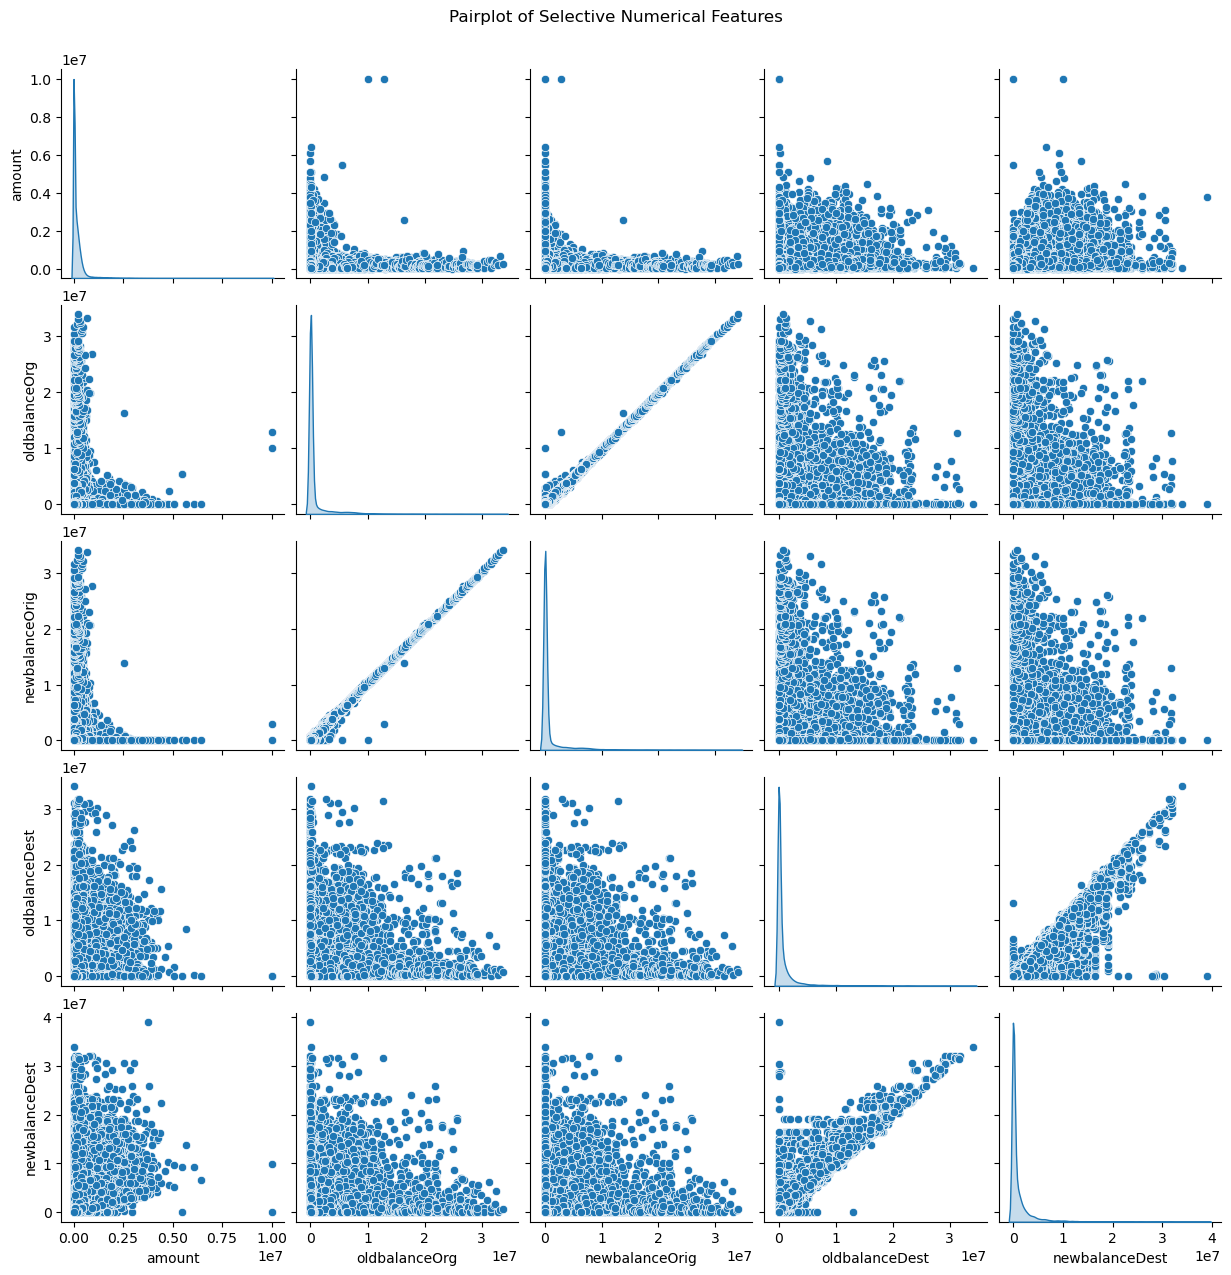

In [71]:
# Pairplot for Selective Numerical Features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
sns.pairplot(df_fd[numerical_features], diag_kind='kde')
plt.suptitle('Pairplot of Selective Numerical Features', y=1.02)
plt.show()

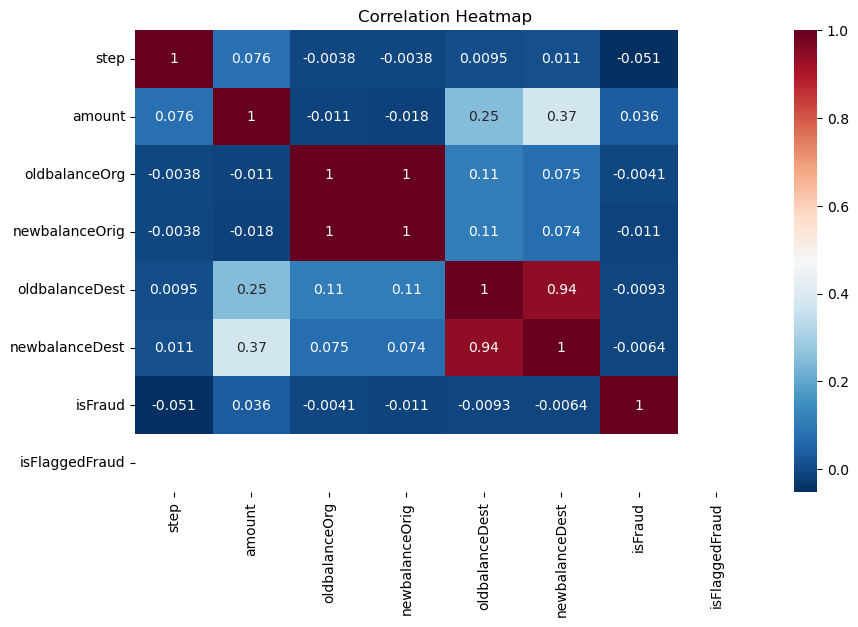

In [35]:
# Correlation Analysis
correlation_matrix = df_fd.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
#Drop the unwanted columns
df_fd.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [37]:
#Label Encoder
la=LabelEncoder()
df_fd['type']=la.fit_transform(df_fd['type'])

In [41]:
#Separate the dependent and independent variables
X=df_fd.drop('isFraud',axis=1)
y=df_fd['isFraud']

In [42]:
# Apply SMOTE for Handling Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [43]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [44]:
# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

### Random Forest 

In [66]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [67]:
# Print the results
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.9993742804224859
Precision: 0.9989003848652972
Recall: 0.9998499099459676
F1 Score: 0.9993749218652331
Confusion Matrix:
 [[19944    22]
 [    3 19985]]


Feature Importance:
          Feature  Importance
0            step    0.260343
3   oldbalanceOrg    0.204775
4  newbalanceOrig    0.168306
1            type    0.113358
5  oldbalanceDest    0.097589
2          amount    0.085501
6  newbalanceDest    0.070128
7  isFlaggedFraud    0.000000


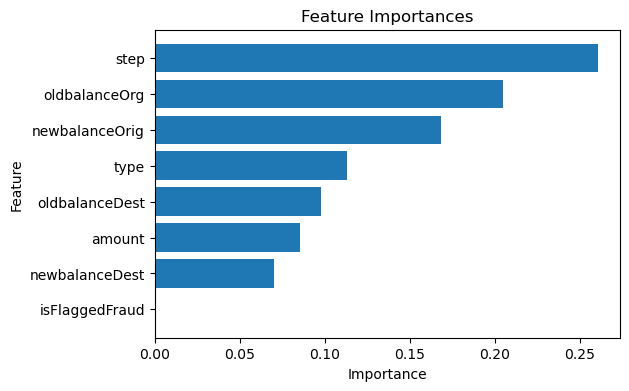

In [72]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Print the feature importances
print("Feature Importance:")
print(feature_importance_df)

# Create a bar plot for feature importances
plt.figure(figsize=(6, 4))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### Gradient Boosting 

In [51]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)


In [52]:
#Print the results
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 0.9887620763878461
Precision: 0.9824682700380266
Recall: 0.9952971783069842
F1 Score: 0.9888411163854165
Confusion Matrix:
 [[19611   355]
 [   94 19894]]


### Adaboost 

In [53]:
# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)

In [54]:
#Print the Results
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Precision:", precision_score(y_test, y_pred_ada))
print("Recall:", recall_score(y_test, y_pred_ada))
print("F1 Score:", f1_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

AdaBoost Classifier:
Accuracy: 0.9660859988987336
Precision: 0.9567135643904113
Recall: 0.9763858314988993
F1 Score: 0.9664496001188502
Confusion Matrix:
 [[19083   883]
 [  472 19516]]


### MLP 

In [55]:
# MLP Classifier
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)

In [56]:
#Print the Results
print("MLP Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp))
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Classifier:
Accuracy: 0.9831306001902188
Precision: 0.9849352214522447
Recall: 0.9812887732639584
F1 Score: 0.9831086161094682
Confusion Matrix:
 [[19666   300]
 [  374 19614]]


### ANN 

In [58]:
#ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
4995/4995 [==============================] - 26s 4ms/step - loss: 0.2646 - accuracy: 0.8959
Epoch 2/10
4995/4995 [==============================] - 25s 5ms/step - loss: 0.1550 - accuracy: 0.9356
Epoch 3/10
4995/4995 [==============================] - 24s 5ms/step - loss: 0.1357 - accuracy: 0.9442
Epoch 4/10
4995/4995 [==============================] - 22s 4ms/step - loss: 0.1266 - accuracy: 0.9485
Epoch 5/10
4995/4995 [==============================] - 22s 4ms/step - loss: 0.1204 - accuracy: 0.9519
Epoch 6/10
4995/4995 [==============================] - 24s 5ms/step - loss: 0.1165 - accuracy: 0.9541
Epoch 7/10
4995/4995 [==============================] - 23s 5ms/step - loss: 0.1135 - accuracy: 0.9556
Epoch 8/10
4995/4995 [==============================] - 22s 4ms/step - loss: 0.1110 - accuracy: 0.9566
Epoch 9/10
4995/4995 [==============================] - 22s 5ms/step - loss: 0.1094 - accuracy: 0.9574
Epoch 10/10
4995/4995 [==============================] - 23s 5ms/step - l

In [59]:
y_pred = ann.predict(X_test)
y_pred_ann = (y_pred > 0.5)

1249/1249 [==============================] - 5s 4ms/step


In [60]:
#Print the result
print("ANN:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Precision:", precision_score(y_test, y_pred_ann))
print("Recall:", recall_score(y_test, y_pred_ann))
print("F1 Score:", f1_score(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))

ANN:
Accuracy: 0.9599289182559944
Precision: 0.9598819468760943
Recall: 0.9600260156093656
F1 Score: 0.9599539758373146
Confusion Matrix:
 [[19164   802]
 [  799 19189]]


In [70]:
# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42)
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Train and evaluate models
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

ann_accuracy = accuracy_score(y_test, y_pred_ann)
accuracy_scores["ANN"] = ann_accuracy

# Convert accuracy scores to a DataFrame 
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient="index", columns=["Accuracy"])

# Display the comparison table
print("Accuracy Comparison Table:")
print(accuracy_df)

Accuracy Comparison Table:
                   Accuracy
Random Forest      0.999374
Gradient Boosting  0.988762
AdaBoost           0.966086
MLP                0.983131
ANN                0.959929
